# jupyter widgets
jupyter widgets forms a framework for representing python objects interactively. 

[video scipy2018](https://www.youtube.com/watch?v=NBZBjEjN-rU)


[scipy2017-jupyter-widgets-tutorial](https://github.com/mwcraig/scipy2017-jupyter-widgets-tutorial/tree/master/notebooks)

## interact

In [1]:
from ipywidgets import interact 

In [2]:
def f(x):
    print(x * x)

In [3]:
interact(f, x=(0, 100));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

Note: it does not print new value in new line 

## FloatSlider

In [4]:
from ipywidgets import FloatSlider 

In [5]:
slider = FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

The control attributes, like its value, are automatically synced between the frontend and the kernel.

In [6]:
slider

FloatSlider(value=8.7, description='Input:', max=10.0, min=5.0)

In [18]:
# get value 
slider.value

8.1

In [19]:
# set the value 
slider.value = 7 # you cannot set less than min 
slider.value 

7.0

## observe (handle change)
You can trigger actions in the kernel when a control value changes by "observing" the value. Here we set a global variable when the slider value changes.


In [20]:
square = slider.value * slider.value
slider.value,square

(7.0, 49.0)

In [21]:
def handle_change(change):
#     print ('test1')
    global square
    square = change.new * change.new
#     print ('square = ',square)
slider.observe(handle_change, 'value')

In [22]:
slider

FloatSlider(value=7.0, description='Input:', max=10.0, min=5.0)

In [23]:
# observe the square is updated 
slider.value, square

(7.0, 49.0)

## link

You can link control attributes and lay them out together

In [24]:
from ipywidgets import FloatText, link, VBox

In [25]:
text = FloatText(description='Value')
link((slider, 'value'), (text, 'value'))
slider

FloatSlider(value=7.0, description='Input:', max=10.0, min=5.0)

In [26]:
text

FloatText(value=7.0, description='Value')

In [28]:
# Lay them out together
VBox([slider, text])

Note: it works in both direction 

#### Python widgets are composed of two pieces:

* Python, which runs in the notebook kernel.
* Javascript, which runs in the browser.

## Visualization sample 

[short video](https://youtu.be/kbgST0uifvM)
<br>[source page](https://github.com/mwcraig/scipy2017-jupyter-widgets-tutorial/blob/master/notebooks/01.00-overview.ipynb)
<br>[source code for visualization](https://github.com/JuanCab/AstroInteractives)

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. 

It is the easiest way to get started using IPython's widgets.

## More about widgets 

### Widgets without writing widgets: interact


In [29]:
def f(x):
    return 5 * x , x

When you pass this function as the first argument to `interact` along with an **integer keyword argument (x=10)**, 
<br>a **slider** is generated and bound to the function parameter.


In [30]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Note: the `;` at the end causes output without `<function __main__.f(x)>`

If you pass **True or False**, interact will generate a **checkbox**:

In [31]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [34]:
# True is casted to 1 and False - to 0 
5 * True

5

If you pass a **string**, interact will generate a **Text field**.

In [35]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interact can also be used as a **decorator**. 

In [37]:
@interact(x=True, y=1.0, z= 'hiWWW')
def g(x, y, z):
    return (x, y,z)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

This resuts the same as the following :

In [38]:

def h(x, y, z):
    return (x, y,z)
interact(h,x =True, y=1.0, z= 'hi');

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Note: interact also works with functions that have multiple arguments.

In [39]:
from ipywidgets import fixed
interact(h, x=True, y=fixed(0.5), z= 'test');

interactive(children=(Checkbox(value=True, description='x'), Text(value='test', description='z'), Output()), _…

Note: No slider is produced for y as its value is fixed.

### Widget abbreviations

When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control with a range of [-10,+3*10]. In this case, 10 is an abbreviation for an actual slider widget:

`IntSlider(min=-10,max=30,step=1,value=10)`

In [40]:
from ipywidgets import IntSlider
IntSlider(min=-10,max=30,step=1,value=10)

IntSlider(value=10, max=30, min=-10)

In [41]:
# the same as interact(f, x=10) but configuring IntSlider explicitely:
from ipywidgets import widgets
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### Dropdown

In [86]:
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

#### Dropdown menu that passes non-string values to the Python function.
pass a list of tuples of the form `('label', value)`

In [87]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

### interactive

Unlike interact, interactive returns a **widget instance** instead of displaying the widget.

In [42]:
from ipywidgets import interactive
from IPython.display import display

def f(a, b):
    display(a + b)
    return a+b

In [43]:
w = interactive(f, a=10, b=20)

In [44]:
type(w)

ipywidgets.widgets.interaction.interactive

In [45]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

To display the widget, use `display`

In [46]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [47]:
w.kwargs

{'a': 10, 'b': 20}

In [48]:
w.result

30

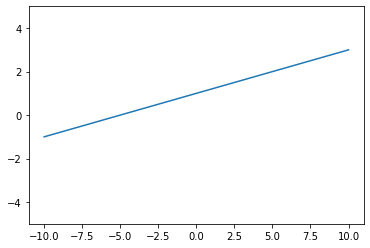

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def f(k, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, k * x + b)
    plt.ylim(-5, 5)
    plt.show()
f(0.2, 1)    

In [50]:
interactive_plot = interactive(f, k=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='k', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Run interaction manually 

In [51]:
from ipywidgets import interact_manual
def slow_function(i):
    """
    Sleep for 1 second then print the argument
    """
    from time import sleep
    print('Sleeping...')
    sleep(1)
    print('value = ',i)

interact_manual(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4));

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

You can do the same thing with `interactive` by using the a dict as the second argument

In [52]:
_interactive = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
_interactive

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

#### Alternative syntax to call interact 

In [53]:
from ipywidgets import widgets
interact == widgets.interact

True

## Select widget implicitely 
### SelectionSlider sample

In [54]:
def show_day(date):
    return date.strftime('%A %-I%p')
    
    
import datetime
options= [datetime.datetime(2020, 2, 2, 1, 0), 
          datetime.datetime(2020, 2, 3, 5, 0), 
          datetime.datetime(2020, 2, 4, 9, 0), 
          datetime.datetime(2020, 2, 5, 13, 0), 
          datetime.datetime(2020, 2, 6, 17, 0), 
          datetime.datetime(2020, 2, 7, 21, 0)]
options
slider = widgets.SelectionSlider(options = options, layout={'width': '700px'})
interact(
    show_day,
    date = slider
);

interactive(children=(SelectionSlider(description='date', layout=Layout(width='700px'), options=(datetime.date…

### Calendar sample

In [55]:
calendar = widgets.DatePicker(
           description='Select Date')
calendar

DatePicker(value=None, description='Select Date')

In [56]:
calendar.value

datetime.date(2021, 12, 25)

In [57]:
# to handle changes
interact(
    show_day,
    date = calendar);

interactive(children=(DatePicker(value=datetime.date(2021, 12, 25), description='Select Date'), Output()), _do…

### Horizontal box sample

In [58]:
text = widgets.Text(
       value='My Text',
       description='Title', )

slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')

checkbox = widgets.Checkbox(
           description='Check to invert',)

box1 = widgets.VBox([text, slider])
box2 = widgets.VBox([menu, checkbox])

children= widgets.HBox([box1, box2])
children

### Tab sample

In [59]:
# defining a list with the contents of our windows
children = [box1, box2]
# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children
# changing the title of the first and second window
tab.set_title(0, 'box1')
tab.set_title(1, 'box2')
tab

### Buttom sample

In [60]:
button = widgets.Button(description='New Button')

def on_button_clicked(_): 
    print('Something happens!')
# link button and function together using a button's method
button.on_click(on_button_clicked)

button


Button(description='New Button', style=ButtonStyle())

Something happens!


## Layout and Styling of Jupyter widgets
### Layout

In [61]:
from ipywidgets import Button, Layout

b = Button(description='(50% width, 80px height) button',
           layout=Layout(width='50%', height='80px', border='2px dotted blue'))
b

Button(description='(50% width, 80px height) button', layout=Layout(border='2px dotted blue', height='80px', w…

### Style

In [64]:
IntSlider(description='A too long description')

IntSlider(value=0, description='A too long description')

In [66]:
style = {'description_width': 'initial'}
IntSlider(description='A too long description', style=style)

IntSlider(value=0, description='A too long description', style=SliderStyle(description_width='initial'))

### Provide style using its attributes 

In [67]:
b1 = Button(description='A', layout=Layout(border='2px solid green'))
b1.style.button_color = 'lightgreen'
b1

Button(description='A', layout=Layout(border='2px solid green'), style=ButtonStyle(button_color='lightgreen'))

In [68]:
b1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_color',
 'font_weight']

### some more samples 

In [69]:

from ipywidgets import Button, HBox, VBox

words = ['A', 'B', 'C', 'D']
items = [Button(description=w, layout=Layout(border='2px solid green')) for w in words]
left_box = VBox([items[0], items[1]])
right_box = VBox([items[2], items[3]])
HBox([left_box, right_box])

In [70]:
from ipywidgets import Layout, Button, Box, Label

item_layout = Layout(height='100px', min_width='40px')
items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)

VBox([Label('Scroll horizontally:'), carousel])


# Learn bqplot on the conda_env 

Note:  it does not work on docker - could not resolve
- installed conda on local machine 
- Created virtual env 
- 

!conda install -c conda-forge bqplot

## A simple plot with the pyplot API

In [129]:
from __future__ import print_function
from IPython.display import display
from ipywidgets import *
from traitlets import *

import numpy as np
import pandas as pd
import bqplot as bq
import datetime as dt

In [130]:
%matplotlib inline
#  This command ensures that all matplotlib plots will be plotted in the output cell within the notebook and will be kept in the notebook when saved.

In [131]:
size = 100
y_data = np.cumsum(np.random.randn(size) * 100.0)
y_data_2 = np.cumsum(np.random.randn(size))
y_data_3 = np.cumsum(np.random.randn(size) * 100.)

x = np.linspace(0.0, 10.0, size)

price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.8], [0.8, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'],
                          index=pd.date_range(start='01-01-2007', periods=150))

symbol = 'Security 1'
dates_all = price_data.index.values
final_prices = price_data[symbol].values.flatten()

In [132]:
from bqplot import pyplot as plt

In [133]:
n = 100
plt.figure ()
plt.plot(np.linspace(0.0, 10.0, n), np.cumsum(np.random.randn(n)), 
         axes_options={'y': {'grid_lines': 'dashed'}})
plt.show()

In [136]:
plt.figure(title='Scatter Plot with colors')
plt.scatter(y_data_2, y_data_3, color=y_data)
plt.show()

In [137]:
plt.figure()
plt.hist(y_data, colors=['OrangeRed'])
plt.show()

## Every component of the figure is an independent widget

In [138]:
xs = bq.LinearScale()
ys = bq.LinearScale()
x = np.arange(100)
y = np.cumsum(np.random.randn(2, 100), axis=1) #two random walks

line = bq.Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red', 'green'])
xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=1000)
display(fig)

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [139]:
# update data of the line mark
line.y = np.cumsum(np.random.randn(2, 100), axis=1)
# run again 

### One mpre sample of dynamic update 

In [140]:
xs = bq.LinearScale()
ys = bq.LinearScale()
x, y = np.random.rand(2, 20)
scatt = bq.Scatter(x=x, y=y, scales={'x': xs, 'y': ys}, default_colors=['blue'])
xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

fig = bq.Figure(marks=[scatt], axes=[xax, yax], animation_duration=1000)
display(fig)

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [141]:
#data updates
scatt.x = np.random.rand(20) * 10
scatt.y = np.random.rand(20)
# run again

In [142]:
xs.min = 4

In [143]:
xs.min = None

In [144]:
xax.label = 'Some label for the x axis'

## Use bqplot figures as input widgets

In [145]:
xs = bq.LinearScale()
ys = bq.LinearScale()
x = np.arange(100)
y = np.cumsum(np.random.randn(2, 100), axis=1) #two random walks

line = bq.Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red', 'green'])
xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

## Selections

In [146]:

def interval_change_callback(change):
    db.value = str(change['new'])

intsel = bq.interacts.FastIntervalSelector(scale=xs, marks=[line])
intsel.observe(interval_change_callback, names=['selected'] )

db = widgets.Label()
db.value = str(intsel.selected)
display(db)


Label(value='None')

In [147]:

fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=1000, interaction=intsel)
display(fig)


Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale(), side='bottom'), Axis(label='y', ori…

In [148]:
# smth does not work  - changhe selection by tap once and then  moving mouse top/down and left/right

# line.selected
line

Lines(colors=['red', 'green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), y=array([[  0.14319559,  -0.31387033,   0.03709608,  -0.81993611,
         -2.76111537,  -4.04489881,  -2.89539818,  -4.5208393 ,
         -5.61957387,  -7.33506337,  -8.57381114,  -8.14892998,
         -8.71467555, -11.00904497,  -9.53641687,  -9.61

In [149]:
handdraw = bq.interacts.HandDraw(lines=line)
fig.interaction = handdraw

In [150]:
line.y[0]

array([  0.14319559,  -0.31387033,   0.03709608,  -0.81993611,
        -2.76111537,  -4.04489881,  -2.89539818,  -4.5208393 ,
        -5.61957387,  -7.33506337,  -8.57381114,  -8.14892998,
        -8.71467555, -11.00904497,  -9.53641687,  -9.61097488,
        -9.86483029,  -8.35045792,  -8.69740674, -11.39602742,
       -11.01708137, -12.49433258, -13.26908946, -11.92297596,
       -12.0940385 , -11.11813922, -11.0445993 ,  -9.87935788,
        -9.36510604,  -8.23095472,  -6.79756512,  -7.77145339,
        -7.66424414,  -8.6453524 ,  -8.8780178 , -10.18491808,
       -10.54582151, -10.10563071, -10.02447337,  -8.98750816,
        -8.25040878,  -8.47822372,  -8.74343388, -10.41645037,
       -11.10444581,  -8.77757292,  -9.13366197, -12.10021072,
       -11.29933974, -11.81900163, -11.06604014, -10.40408797,
       -11.30813239, -11.96101285, -13.93404501, -13.16971123,
       -13.59089419, -12.55249424, -13.24715223, -12.46116667,
       -10.49661597,  -9.28604393,  -9.40321928, -10.10

## Moving points around

drag one point and line will reflect the average 


In [151]:
from bqplot import *

size = 100
np.random.seed(0)
x_data = range(size)
y_data = np.cumsum(np.random.randn(size) * 100.0)

## Enabling moving of points in scatter. Try to click and drag any of the points in the scatter and 
## notice the line representing the mean of the data update

sc_x = LinearScale()
sc_y = LinearScale()

scat = Scatter(x=x_data[:10], y=y_data[:10], scales={'x': sc_x, 'y': sc_y}, default_colors=['blue'],
               enable_move=True)
lin = Lines(scales={'x': sc_x, 'y': sc_y}, stroke_width=4, line_style='dashed', colors=['orange'])
m = Label(value='Mean is %s'%np.mean(scat.y))

def update_line(change):
    with lin.hold_sync():
        lin.x = [np.min(scat.x), np.max(scat.x)]
        lin.y = [np.mean(scat.y), np.mean(scat.y)]
        m.value='Mean is %s'%np.mean(scat.y)
        

update_line(None)

# update line on change of x or y of scatter
scat.observe(update_line, names='x')
scat.observe(update_line, names='y')

ax_x = Axis(scale=sc_x)
ax_y = Axis(scale=sc_y, tick_format='0.2f', orientation='vertical')

fig = Figure(marks=[scat, lin], axes=[ax_x, ax_y])

## In this case on drag, the line updates as you move the points.
with scat.hold_sync():
    scat.enable_move = True
    scat.update_on_move = True
    scat.enable_add = False

display(m, fig)

Label(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}}, tooltip_style={'opacity': 0.9})

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale(), tick_format='0.2f')]…